In [1]:
import numpy as np
import scipy as sp
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
import time
from ipywidgets import interact
from os import path
from scipy.integrate import quad, nquad
from scipy.special import gamma
from scipy.optimize import fsolve


In [601]:
mu=2
beta = 3
eS0= 2**10
r= lambda s: eS0*s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2
options={'limit':500}
dz= lambda x: r(x)*y(x)
zmax=5
Z1= nquad(dz, [[0, zmax]])[0]

w= lambda s: y(s)/Z1



def integrand_re(z,R):
    return np.real(r(z)*w(z)/(1-w(z)*R))

def integrand_im(z,R):
    return np.imag(r(z)*w(z)/(1-w(z)*R))

def Zn_calc(R):
    '''Calculates Zn'''
    options={'limit':20}
    integral_re= nquad(integrand_re, [[0, zmax]], args=(R,),opts=[options,options])[0]
    integral_im= nquad(integrand_im, [[0, zmax]], args=(R,),opts=[options,options])[0]
    return integral_re+1j*integral_im


k=2**6

# # Llist=np.linspace(0,1,2000)*4
# Llist=np.linspace(0,0.2,1000)/k
# # Rlist=np.zeros(len(Llist))
# R_ex=np.zeros(len(Llist))
# R_ex_re=np.zeros(len(Llist))

# s0=0.5
# # dR=0.5
# r0=r(s0)
# w0=w(s0)
# # for i_l in range(len(Llist)):
# #     lmbda = Llist[i_l]
# # #     Rold=1j*20
# # # #     Rnew= k/ (lmbda -Zn_calc(Rold,k))
# # #     Rnew= k/(lmbda-r0*w0/(k-w0*Rold))
# # #     while np.abs((Rnew-Rold)/Rold)>dR:
# # #         Rold=Rnew
# # # #         Rnew= k/ (lmbda -Zn_calc(Rold,k))
# # #         Rnew= k/(lmbda-r0*w0/(k-w0*Rold))
# # #     Rlist[i_l] =  np.imag(Rnew)
# #     R_ex[i_l]=np.imag((lmbda+w0-r0*w0/k+ \
# #                       ((lmbda+w0-r0*w0/k)**2-4*lmbda*w0+1j*0)**0.5)/(2*lmbda*w0) )
# #     R_ex_re[i_l]=np.real((lmbda+w0-r0*w0/k+ \
# #                       ((lmbda+w0-r0*w0/k)**2-4*lmbda*w0+1j*0)**0.5)/(2*lmbda*w0) )

from scipy.optimize import fsolve, fmin_cobyla
def constr1(x):
    return x

# Rlist= np.linspace(-2,2,20)*5e2 # 3 qubits
Rlist= np.linspace(-3,3,30)*1e3 # 6 qubits
lmbda_list= np.zeros(len(Rlist))
Rres_list= np.zeros(len(Rlist))
# plt.figure()
for i_im in range(len(Rlist)):
    R= Rlist[i_im]
    print(i_im,end='\r')
#     lmin= lambda x: k/(x+1j*R)+r0*w0/(k-w0*(x+1j*R))    
#     lmin= lambda x: 1/(1j*x+R)+r0*w0/k/(1-w0*(1j*x+R))    
    lmin = lambda x: 1/(1j*x+R) + Zn_calc(1j*x+R)/k
    lmin_im= lambda x: np.abs(np.imag(lmin(x)))
    if k==2**3:
        R_guess=5e2
    elif k==2**6:
        R_guess=2e3
    R_result= fmin_cobyla(lmin_im, R_guess, constr1, rhoend=1e-3)
    if lmin_im(R_result)<1e-5:
        lmbda_list[i_im]=np.real(lmin(R_result))
        Rres_list[i_im]=R_result
#         plt.plot(lmbda_list[i_im],R_result,'ro',markersize=4)
# #         plt.plot(lmbda_list[i_im],Rlist[i_im],'ro',markersize=4)
# #        plt.plot(lmbda_list[i_im],R_result,'rv',markersize=4)

#     R_guess=20
#     R_result= fmin_cobyla(lmin_im, R_guess, constr1, rhoend=1e-7)
#     if lmin_im(R_result)<1e-3:
#         lmbda_list[i_im]=np.real(lmin(R_result))
# #         print(l_result)
#         plt.plot(lmbda_list[i_im],Rlist[i_im],'gx',markersize=4)
# #         plt.plot(lmbda_list[i_im],R_result,'gv',markersize=4)

# #     else:
# #         lmbda_list[i_im]=


# Rlist_re= np.linspace(0.1,1,40)*1e5
# Rlist_im= np.linspace(0.1,1,20)*1e2
# lmbda_list= np.zeros((len(Rlist_re),len(Rlist_im)), dtype=np.complex128)

# for i_1 in range(len(Rlist_re)):
#     print(i_1,end='\r')
#     Rr= Rlist_re[i_1]
#     for i_2 in range(len(Rlist_im)):
#         Ri= Rlist_im[i_2]
# #         lmbda_list[i_1,i_2]= 1/(1j*Ri+Rr)+r0*w0/k/(1-w0*(1j*Ri+Rr))
#         lmbda_list[i_1,i_2]= 1/(1j*Ri+Rr)+Zn_calc(1j*Ri+Rr)/k

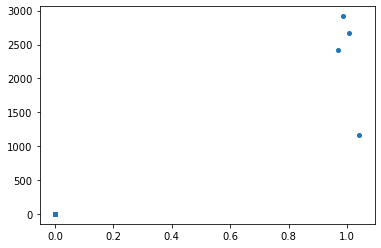

In [604]:
plt.figure()
plt.plot(k*lmbda_list,Rres_list,'o',markersize=4)
# plt.plot(k*Llist,R_ex,'-')
# plt.plot(k*Llist,R_ex_re,'-',markersize=2)
# plt.ylim(0,1e4)
plt.show()
# print(Rres_list)

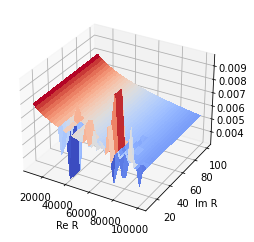

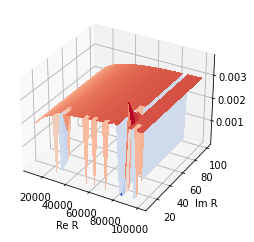

In [334]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y= np.meshgrid(Rlist_re,Rlist_im)
surf = ax.plot_surface(X,Y, np.transpose(np.real(lmbda_list)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# ax.view_init(25, 60)
plt.xlabel('Re R')
plt.ylabel('Im R')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y, np.transpose(np.imag(lmbda_list)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel('Re R')
plt.ylabel('Im R')
# ax.view_init(15, 60)

# plt.plot(Llist,R_ex,'-')
# plt.plot(Llist,R_ex_re,'-',markersize=2)
# plt.xlim(0,Llist.max())
# # plt.ylim(0,1e3)
plt.show()

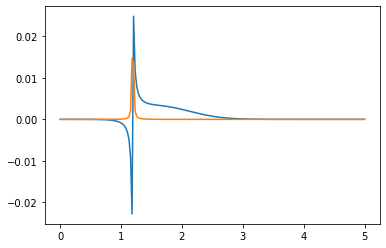

In [188]:
k=2**8
R=k*1e2+1j*1e3
xplot=np.linspace(0,5,200)
yplot=np.zeros(len(xplot), dtype=np.complex128)
for i_x in range(len(xplot)):
#     yplot[i_x]= integrand_re(xplot[i_x],R,k)
    yplot[i_x]= r(xplot[i_x])*w(xplot[i_x])/k/(1-w(xplot[i_x])*R)
# print(yplot)
plt.plot(xplot,np.real(yplot))
plt.plot(xplot,np.imag(yplot))
plt.show()
# print(Z1)


/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


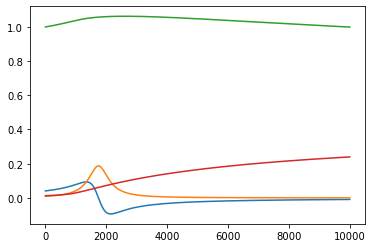

In [266]:
# s0=0.6
xplot=np.linspace(1,1e4,200)+4e2*1j
y1=np.zeros(len(xplot), dtype=np.complex128)
y2=np.zeros(len(xplot), dtype=np.complex128)
for i_x in range(len(xplot)):
    y1[i_x]= r(s0)*w(s0)/(1-w(s0)*xplot[i_x])
    y2[i_x]= Zn_calc(xplot[i_x])
    
# print(yplot)
plt.plot(xplot,np.real(y1))
plt.plot(xplot,np.imag(y1))
plt.plot(xplot,np.real(y2))
plt.plot(xplot,np.imag(y2))
plt.show()

k/eS0 = 4.00 elapsed time = 7.49 sec


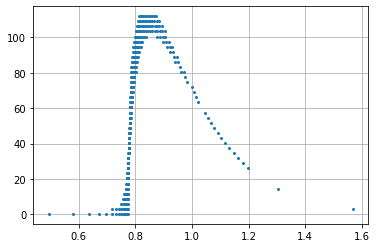

In [62]:
mu=2
beta = 3
eS0= 2**10
r= lambda s: eS0*s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2
options={'limit':500}
dz= lambda x: r(x)*y(x)
#     def i_rho_s(x):
#         return (2*pi*np.cosh(2*pi*x)-np.sinh(2*pi*x))/(8*pi**4) - k/eS0
zmax= 5 #fsolve(i_rho_s,1)
Z1= nquad(dz, [[0, zmax]])[0]
w= lambda s: y(s)/Z1

def integrand_re(z,R):
    return np.real(r(z)*w(z)/(1-w(z)*R))

def integrand_im(z,R):
    return np.imag(r(z)*w(z)/(1-w(z)*R))


def Zn_calc(R):
    '''Calculates Zn'''
    options={'limit':20}
    integral_re= nquad(integrand_re, [[0, zmax]], args=(R,),opts=[options,options])[0]
    integral_im= nquad(integrand_im, [[0, zmax]], args=(R,),opts=[options,options])[0]
    return integral_re+1j*integral_im


# # k=2**3
# s0=0.4
# r0=r(s0)
# w0=w(s0)

# Llist_0=np.linspace(0,.2,200)/k
# # Llist_0=np.array([.1/k])
# R_ex=(Llist_0+w0-r0*w0/k+ \
#     ((Llist_0+w0-r0*w0/k)**2-4*Llist_0*w0+1j*0)**0.5)/(2*Llist_0*w0) 

# klist=[2**6,2**8,2**10,2**12,]
# klist=[2**12,r(2*pi/beta)]
klist=[2**12]
# Rr,Ri = np.meshgrid(Rlist_re,Rlist_im)
# lmbda_list= 1/(1j*Ri+Rr)+r0*w0/k/(1-w0*(1j*Ri+Rr))

plt.figure()

for k in klist:
#     if k==2**3:
#         Rlist_re= np.linspace(-2,2,30)*5e2
#         Rlist_im= np.linspace(0.01,1.1,40)*1e3
    if k==2**6:
#         Rlist_re= np.linspace(-3,3,100)*1e3
        Rlist_re= np.linspace(-3,3,30)*1e3 # 6 qubits
        Rlist_im= np.linspace(0.01,3,40)*1e3
    elif k==2**8:
        Rlist_re= np.linspace(-1.6,1,30)*4e3
        Rlist_im= np.linspace(0.01,7,40)*1e3
    elif k==2**10:
        Rlist_re= np.linspace(-2,1,30)*1e4
        Rlist_im= np.linspace(0.01,1.5,40)*1e4
    elif k==2**12:
        Rlist_re= np.linspace(-5,2,30)*1e4
        Rlist_im= np.linspace(0.01,4.2,40)*1e4
    else:
#         Rlist_re= np.linspace(-5,2,30)*1e5
#         Rlist_im= np.linspace(0.01,5,40)*1e5
#### critical point k=r(2*pi/beta)
        Rlist_re= np.concatenate((np.linspace(-8,2,30)*1e8,np.linspace(0.5,1.5,20)*1e8))
        Rlist_im= np.concatenate((np.linspace(0.01,1,40)*1e9,np.linspace(0.5,1.5,20)*1e8))
#         Rlist_re= np.linspace(-7,2,30)*1e9
#         Rlist_im= np.linspace(0.01,1,40)*1e10

    
    t_timer=time.time()

    lmbda_list= np.zeros((len(Rlist_re),len(Rlist_im)), dtype=np.complex128)
    for i_r in range(len(Rlist_re)):
        Rr=Rlist_re[i_r]
        for i_i in range(len(Rlist_im)):
            Ri=Rlist_im[i_i]
    #         lmbda_list[i_r,i_i]= 1/(1j*Ri+Rr)+r0*w0/k/(1-w0*(1j*Ri+Rr))
            lmbda_list[i_r,i_i]= 1/(1j*Ri+Rr)+Zn_calc(1j*Ri+Rr)/k

    elapsed = time.time() - t_timer
    print("k/eS0 = %.2f " % (k/eS0) + "elapsed time = %.2f " % (elapsed) + "sec")
    if k<= 4*eS0:
        inds= np.argwhere(np.abs(np.imag(lmbda_list))<2e-6)
    else:
        inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-10)
        
    # plt.plot(k*Llist,Rlist,'ro',markersize=4)
#     plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=3)
    plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]]/Z1,'o',markersize=2)
    # plt.ylim(-2e3,8e3)
#     plt.xlim(0.9,1.1)
#     plt.ylim(0,4e3)

plt.grid()
plt.show()


# print(lmbda_list[inds[:][3]])
# print(lmbda_list[inds[:,0],inds[:,1]])
# print(inds[100][:])
# print(inds.shape)

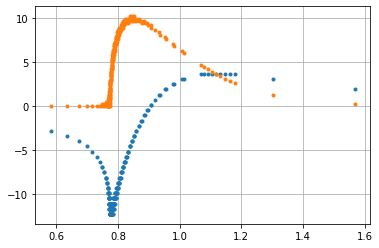

In [63]:
plt.figure()
inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-6)
plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]]/k,'o',markersize=3)
plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]]/k,'o',markersize=3)
# inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-6)
# # plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=3)
# plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=3)
plt.grid()
# plt.xlim(0.9,1.1)
plt.show()
# print(Rres_list)

/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (20) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


k/eS0 = 4.00 elapsed time = 7.24 sec


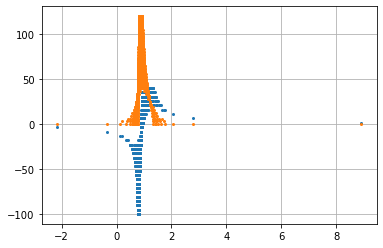

In [70]:
# rescaled

mu=2
beta = 3
r= lambda s: s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2

dz= lambda x: r(x)*y(x)
zmax= 5
Z1= nquad(dz, [[0, zmax]])[0]

def integrand_re(z,R):
    return np.real(r(z)*y(z)/(1-y(z)*R))

def integrand_im(z,R):
    return np.imag(r(z)*y(z)/(1-y(z)*R))


def Zn_calc(R):
    '''Calculates Zn'''
    options={'limit':20}
    integral_re= nquad(integrand_re, [[0, zmax]], args=(R,),opts=[options,options])[0]
    integral_im= nquad(integrand_im, [[0, zmax]], args=(R,),opts=[options,options])[0]
    return integral_re+1j*integral_im


kdS0list=[4]

plt.figure()

for kdS in kdS0list:
#     Rlist_re= np.linspace(-10,8,30) 
    Rlist_re= np.linspace(-100,40,30)
    Rlist_im= np.linspace(0.01,120,40)
    
    t_timer=time.time()

    lmbda_list= np.zeros((len(Rlist_re),len(Rlist_im)), dtype=np.complex128)
    for i_r in range(len(Rlist_re)):
        Rr=Rlist_re[i_r]
        for i_i in range(len(Rlist_im)):
            Ri=Rlist_im[i_i]
            lmbda_list[i_r,i_i]= 1/(1j*Ri+Rr)+Zn_calc(1j*Ri+Rr)/kdS

    elapsed = time.time() - t_timer
    print("k/eS0 = %.2f " % (kdS) + "elapsed time = %.2f " % (elapsed) + "sec")
    inds= np.argwhere(np.abs(np.imag(lmbda_list))<2e-2)
        
    plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=2)
    plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=2)
    # plt.ylim(-2e3,8e3)
#     plt.xlim(0.9,1.1)
#     plt.ylim(0,4e3)

plt.grid()
plt.show()

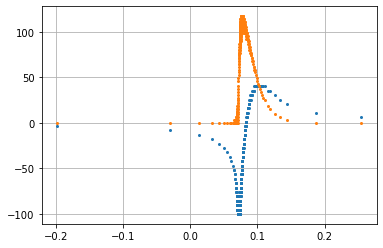

In [71]:
plt.figure()
inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-3)
# plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=2)
# plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=2)
plt.plot(np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=2)
plt.plot(np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=2)
plt.grid()
# plt.xlim(0.,2.)
plt.show()
# print(Rres_list)

In [113]:
# rescaled

mu=2
beta = 3
r= lambda s: s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2

dz= lambda x: r(x)*y(x)
zmax= 5 
Z1_norm= nquad(dz, [[0, zmax]])[0]

def integrand_re(z,R):
    return np.real(r(z)*y(z)/(1-y(z)*R))

def integrand_im(z,R):
    return np.imag(r(z)*y(z)/(1-y(z)*R))


def Zn_calc(R):
    '''Calculates Zn'''
    options={'limit':20}
    integral_re= nquad(integrand_re, [[0, zmax]], args=(R,),opts=[options,options])[0]
    integral_im= nquad(integrand_im, [[0, zmax]], args=(R,),opts=[options,options])[0]
    return integral_re+1j*integral_im

from scipy.optimize import fsolve, fmin_cobyla, fmin
def constr1(x):
    return x-0.1

kdS=4

Rlist= np.linspace(-200,60,100)
#     R1= np.linspace(-100,30,100)
#     R2= np.linspace(-150,100,100)
#     Rlist=np.concatenate((R1,R2))

def spec_finder(kdS,R_guess):
    lmbda_list= np.zeros(len(Rlist))
    Rres_list= np.zeros(len(Rlist))

    for i_im in range(len(Rlist)):
        R= Rlist[i_im]
        print(i_im,end='\r')
        lmin = lambda x: 1/(1j*x+R) + Zn_calc(1j*x+R)/kdS 
        lmin_im= lambda x: np.abs(np.imag(lmin(x)))
#         R_guess=1
        R_result= fmin_cobyla(lmin_im, R_guess, constr1)#, rhoend=1e-3)
#         R_result= fmin(lmin_im, R_guess,disp=False)
    #     if lmin_im(R_result)<1e-1:
        lmbda_list[i_im]=np.real(lmin(R_result))
        Rres_list[i_im]=R_result
    return lmbda_list,Rres_list

lmbda_list_eq,Rres_list = spec_finder(kdS,R_guess=100)
# lmbda_list_eq2,Rres_list2 = spec_finder(kdS,R_guess=1)


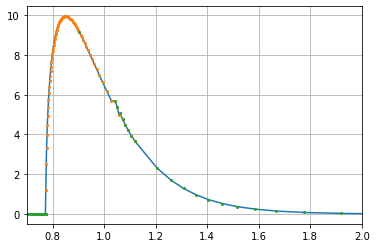

In [116]:
inds= np.argwhere(np.abs(np.imag(lmbda_list))<6e-4)


from scipy.interpolate import interp1d, UnivariateSpline
xlist=np.concatenate((lmbda_list_eq,lmbda_list_eq2))
ylist=np.concatenate((Rres_list,Rres_list2)) 
# xlist=np.real(lmbda_list[inds[:,0],inds[:,1]])
# ylist=Rlist_im[inds[:,1]]
i_x=np.argsort(xlist)
xlist=xlist[i_x]
ylist=ylist[i_x]
f = interp1d(xlist, ylist)
# f = UnivariateSpline(xlist, ylist)
xplot=np.linspace(xlist.min(),xlist.max(),2000)
yplot=f(xplot)

plt.figure()
# plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]]*Z1/kdS,'v',markersize=2)
# plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]]*Z1/kdS,'v',markersize=2)
plt.plot(kdS/Z1*xplot,yplot*Z1/kdS,'-',markersize=2)

# inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-6)
# plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]]/k,'v',markersize=3)
# plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]]/k,'v',markersize=3)

plt.plot(kdS/Z1_norm*lmbda_list_eq,Rres_list*Z1_norm/kdS,'o',markersize=2)
plt.plot(kdS/Z1_norm*lmbda_list_eq2,Rres_list2*Z1_norm/kdS,'o',markersize=2)
# plt.plot(kdS/Z1_norm*lmbda_list_eq,Rlist*Z1_norm/kdS,'o',markersize=2)
# plt.plot(kdS/Z1_norm*lmbda_list_eq2,Rlist*Z1_norm/kdS,'o',markersize=2)
# plt.plot(lmbda_list_eq,Rres_list,'o',markersize=2)
# plt.plot(lmbda_list_eq2,Rres_list2,'o',markersize=2)
# plt.plot(lmbda_list_eq,Rlist,'o',markersize=2)
# plt.plot(lmbda_list_eq2,Rlist,'o',markersize=2)
# plt.plot(kdS/Z1*xplot,yplot*Z1/kdS,'-',markersize=2)

plt.xlim(0.7,2)
plt.grid()
plt.show()

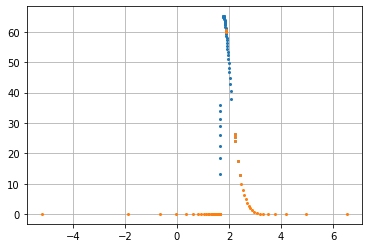

In [27]:
plt.figure()
plt.plot(kdS/Z1*lmbda_list_eq,Rres_list,'o',markersize=2)
plt.plot(kdS/Z1*lmbda_list_eq2,Rres_list2,'o',markersize=2)
# plt.plot(kdS/Z1*lmbda_list,Rlist,'o',markersize=2)
plt.xlim(0.8,1.4)
plt.grid()
plt.show()

[1.89310083]
27528.667072836073


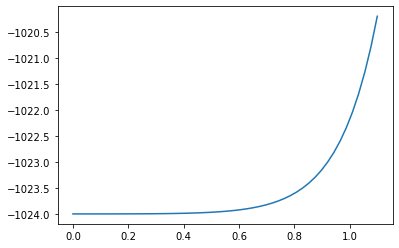

In [735]:
k=eS0*2**10
def i_rho_s(x):
    return (2*pi*x*np.cosh(2*pi*x)-np.sinh(2*pi*x))/(8*pi**4) - k/eS0

zmax= fsolve(i_rho_s,4)
print(zmax)
print(r(2*pi/beta)/eS0)

xplot=np.linspace(0,1.1)
plt.figure()
plt.plot(xplot,i_rho_s(xplot))
plt.show()

In [ ]:
mu=2
beta = 3
eS0= 2**8
r= lambda s: eS0*s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2
options={'limit':500}
dz= lambda x: r(x)*y(x)
zmax=5
Z1= nquad(dz, [[0, zmax]])[0]

w= lambda s: y(s)/Z1

def integrand_re(z,R):
    return np.real(r(z)*w(z)/(1-w(z)*R))

def integrand_im(z,R):
    return np.imag(r(z)*w(z)/(1-w(z)*R))

def Zn_calc(R):
    '''Calculates Zn'''
    options={'limit':20}
    integral_re= nquad(integrand_re, [[0, zmax]], args=(R,),opts=[options,options])[0]
    integral_im= nquad(integrand_im, [[0, zmax]], args=(R,),opts=[options,options])[0]
    return integral_re+1j*integral_im

k=2**7
s0=0.5
dR=0.01
r0=r(s0)
w0=w(s0)

# Llist_0=np.linspace(0,.2,200)/k
Llist_0=np.array([.1/k])
R_ex=(Llist_0+w0-r0*w0/k+ \
    ((Llist_0+w0-r0*w0/k)**2-4*Llist_0*w0+1j*0)**0.5)/(2*Llist_0*w0) 

print(R_ex)
# Llist=np.linspace(0,.2,20)/k
Llist=np.array([.06/k])
Rlist=np.zeros(len(Llist))

plt.figure()
for i_l in range(len(Llist)):
    print(i_l,end='\r')
    lmbda = Llist[i_l]
    Rold=1e3+1j*1e3
#     Rnew= k/ (lmbda -Zn_calc(Rold,k))
#     Rnew= (1-r0*w0*Rold/k/(1-w0*Rold))/lmbda
    Rnew= 1/(lmbda-r0*w0/k/(1-w0*Rold))
    counter=0
    while np.abs((Rnew-Rold)/Rold)>dR and counter<1000:
        Rold=Rnew
#         Rnew= k/ (lmbda -Zn_calc(Rold,k))
        Rnew= 1/(lmbda-r0*w0/k/(1-w0*Rold))
#         Rnew= (1-r0*w0*Rold/k/(1-w0*Rold))/lmbda
#         plt.plot(np.real(Rnew),np.imag(Rnew),'o')
        plt.plot(counter,np.real(Rnew),'bo')
        plt.plot(counter,np.imag(Rnew),'rx')
        counter += 1
    if counter<100:
        Rlist[i_l] =  np.imag(Rnew)

plt.show()
print(Rnew)

In [426]:
a=np.array([[0,1,2],[3,4,5],[6,7,8]])
i_a=np.argwhere(np.abs(a-3)>1)
print(a[i_a[:,0],i_a[:,1]])

[0 1 5 6 7 8]


In [4]:

def Gz(z,a,b):
    '''Direct solution to G(z), faster but has numerical instability for large V
    a=  Lb/L2
    b=  Lb*L1/L2
    '''
    a2= (b-1)/z +1j*0
    a1= (a-z)/z +1j*0
    a0= 1/z +1j*0
    Q= (3*a1-a2**2)/9 +1j*0
    R= (9*a2*a1-27*a0-2*a2**3)/54 +1j*0
    D= Q**3 + R**2 +1j*0
    S= (R+D**0.5 +1j*0)**(1/3)
    T= (R-D**0.5 +1j*0)**(1/3)
    z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
    return np.abs(np.imag(z4))

def integrand(z, a, b):
    return Gz(z,a,b)*np.abs(z)

def neg_calc(a,b):
    '''Calculates logneg by \int P(z)|z| dz
    where P(z) is spectral density'''
    options={'limit':500}
    integral= nquad(integrand, [[-np.inf, np.inf]], args=(a, b),opts=[options,options])[0]
    return integral

r=2 # local Hilbert space dim
def logneg_plotter(V=20,Ra=0.6):
    R12_list=np.linspace(0.01,0.49,100)
    logneg=np.zeros(len(R12_list))
    for i_1 in range(len(R12_list)):
        R12=R12_list[i_1]
        Lb= r**((1-Ra)*V)
        L1= r**(R12*Ra*V)
        L2= r**((1-R12)*Ra*V)

        a = Lb/L2 +1j*0
        b = Lb/L2*L1 +1j*0
        logneg[i_1]=np.log2(neg_calc(a,b)*(L2*L1)/pi/(L1*Lb))
        
    plt.plot(R12_list,logneg/V,'-',label='V=%.2f' % (V))
    plt.plot(R12_list,R12_list*Ra,'--')
    plt.plot([(1-1/(2*Ra))]*2,[R12_list[0]*Ra,R12_list[-1]*Ra],'k--')
    plt.xlabel('$N_{A_1}/N_A$')
    plt.ylabel('LogNeg')
    plt.show()

interact(logneg_plotter, V=(4,32,4),Ra=(0,1,0.05));

interactive(children=(IntSlider(value=20, description='V', max=32, min=4, step=4), FloatSlider(value=0.6, desc…

In [5]:
# shows finite size effects (previous cell contains the functions, next cell contains plots)
r=2 # local Hilbert space dim
Ra=0.6 # (N1+N2)/V
Vlist=np.arange(10,51,10)
R12_list=np.linspace(0.01,0.49,100)
logneg=np.zeros((len(R12_list),len(Vlist)))
for i_V in range(len(Vlist)):
    V=Vlist[i_V]
    t_timer=time.time()
    
    for i_1 in range(len(R12_list)):
        R12=R12_list[i_1]
        Lb= r**((1-Ra)*V)
        L1= r**(R12*Ra*V)
        L2= r**((1-R12)*Ra*V)

        a = Lb/L2 +1j*0
        b = Lb/L2*L1 +1j*0
        logneg[i_1,i_V]=np.log2(neg_calc(a,b)*(L2*L1)/pi/(L1*Lb))    
        
    elapsed = time.time() - t_timer
    print("logneg was calculated for %d qubits" % (V) + ", elapsed time = %.2f " % (elapsed)+ "sec")

logneg was calculated for 10 qubits, elapsed time = 4.69 sec


/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


logneg was calculated for 20 qubits, elapsed time = 4.67 sec


<ipython-input-4-8440fc540afb>:16: RuntimeWarning: divide by zero encountered in cdouble_scalars
  z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
<ipython-input-4-8440fc540afb>:16: RuntimeWarning: invalid value encountered in cdouble_scalars
  z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.

logneg was calculated for 30 qubits, elapsed time = 6.01 sec
logneg was calculated for 40 qubits, elapsed time = 6.58 sec
logneg was calculated for 50 qubits, elapsed time = 8.87 sec


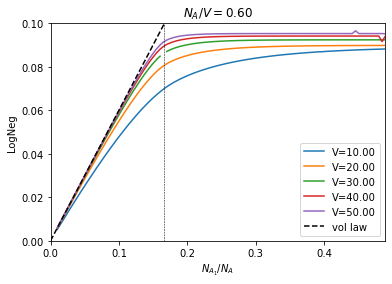

In [6]:
plt.figure()
for i_V in range(len(Vlist)):
    V=Vlist[i_V]
    plt.plot(R12_list,logneg[:,i_V]/V,'-',label='V=%.2f' % (V),color='C%d' % (i_V))
    
if Ra>0.5:
    ymax=0.1
    plt.plot([0,ymax/Ra],[0,ymax],'k--', label='vol law')
    plt.plot([(1-1/(2*Ra))]*2,[0,ymax],'k--',linewidth=0.5)
    plt.ylim(0,ymax)
plt.xlim(0,R12_list[-1])
plt.title('$N_A/V=$%.2f' % (Ra) )
plt.xlabel('$N_{A_1}/N_A$')
plt.ylabel('LogNeg')
plt.legend(loc='lower right')
plt.show()

In [7]:

r=2 # local Hilbert space dim
R12=0.3 # N1/(N1+N2), must be smaller than 0.5

Vlist=np.arange(20,41,20)
Ra_list=np.linspace(0.4,0.98,40)
logneg=np.zeros((len(Ra_list),len(Vlist)))
for i_V in range(len(Vlist)):
    V=Vlist[i_V]
    t_timer=time.time()
    
    for i_a in range(len(Ra_list)):
        Ra=Ra_list[i_a]
        Lb= r**((1-Ra)*V)
        L1= r**(R12*Ra*V)
        L2= r**((1-R12)*Ra*V)

        a = Lb/L2 +1j*0
        b = Lb/L2*L1 +1j*0
        logneg[i_a,i_V]=np.log2(neg_calc(a,b)*(L2*L1)/pi/(L1*Lb))  
        
    elapsed = time.time() - t_timer
    print("logneg was calculated for %d qubits" % (V) + ", elapsed time = %.2f " % (elapsed)+ "sec")

logneg was calculated for 20 qubits, elapsed time = 2.60 sec


/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


logneg was calculated for 40 qubits, elapsed time = 3.91 sec


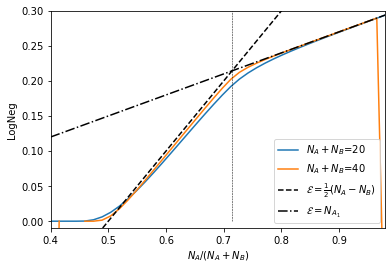

In [8]:
plt.figure()
for i_V in range(len(Vlist)):
    V=Vlist[i_V]
    plt.plot(Ra_list,logneg[:,i_V]/V,'-',label='$N_A+N_B$=%.0f' % (V),color='C%d' % (i_V))
    
plt.plot(Ra_list,Ra_list-0.5,'k--',label=r'${\cal E}=\frac{1}{2}(N_{A}-N_B)$')
plt.plot(Ra_list,Ra_list*R12,'k-.',label=r'${\cal E}=N_{A_1}$')
ymax=0.3
plt.plot([1/(1-R12)/2]*2,[0,ymax],'k--',linewidth=0.5)
plt.ylim(-0.01,ymax)
plt.xlabel('$N_{A}/(N_A+N_B)$')
plt.ylabel('LogNeg')
plt.xlim(Ra_list.min(),Ra_list.max())
plt.legend()
plt.show()

In [130]:
r=2
Na=10
Nblist=[4]
# Nblist=np.arange(int(Na/2)-2,int(Na/2)+2)
out_dir = 'LN_figs/' 

logneg_q_avg= np.zeros((int(Na/2)+1,len(Nblist)))

R12_list=np.linspace(0.01,0.49,100)
logneg=np.zeros((len(R12_list),len(Nblist)))

for i_c in range(len(Nblist)):
    Nb=Nblist[i_c]
#     f1= 'LN_r_%d_NA_%d_NB_%d.npz' % (r,Na,Nb)
#     fname = out_dir+f1
#     if path.exists(fname):
#         npzfile = np.load(fname)
#         neg_q=npzfile['logneg']
#         print('rand matrix averaged over %d reps' % (np.size(neg_q,1)))
#     logneg_q_avg[:,i_c]=np.log2(2*np.mean(neg_q,axis=1)+1)
    
    for i_1 in range(len(R12_list)):
        R12=R12_list[i_1]
        Lb= r**Nb
        L1= r**(R12*Na)
        L2= r**((1-R12)*Na)

        a = Lb/L2 +1j*0
        b = Lb/L2*L1 +1j*0
        logneg[i_1,i_c]=np.log2(neg_calc(a,b)*(L2*L1)/pi/(L1*Lb))

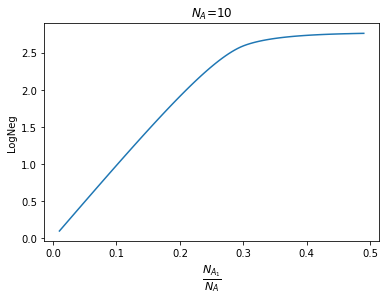

In [133]:
plt.figure()

for i_c in range(len(Nblist)):
    Nb=Nblist[i_c]
#     plt.plot(np.arange(0,int(Na)/2+1)/Na, logneg_q_avg[:,i_c], 'o',color='C%d' % (i_c),label='$N_B$= %d' % Nb)
    plt.plot(R12_list,logneg[:,i_c],'-',color='C%d' % (i_c))
plt.title(r'$N_A$=%d' % (Na))
# plt.ylim(-0.1,5.)
# plt.xlim(-0.01,0.51)
plt.xlabel(r'$\frac{N_{A_1}}{N_A}$',fontsize=16)
plt.ylabel('LogNeg')
# plt.legend()
plt.show()